In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2


In [110]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [120]:
# 이미지 로드, 색상 수 설정
image = get_image('975.jpg')
number_of_colors = 3
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [121]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

In [122]:
#검정색 데이터는 제거
for i in range(len(hex_colors)):
    try:
        if hex_colors[i] == '#000000':
            del counts[i]
            del hex_colors[i]
    except:
        pass

([<matplotlib.patches.Wedge at 0x2a470a8e880>,
 [Text(-0.04052911306531312, 1.0992531059742972, '#129596'),
  Text(0.04052911306531274, -1.0992531059742972, '#21cdce')])

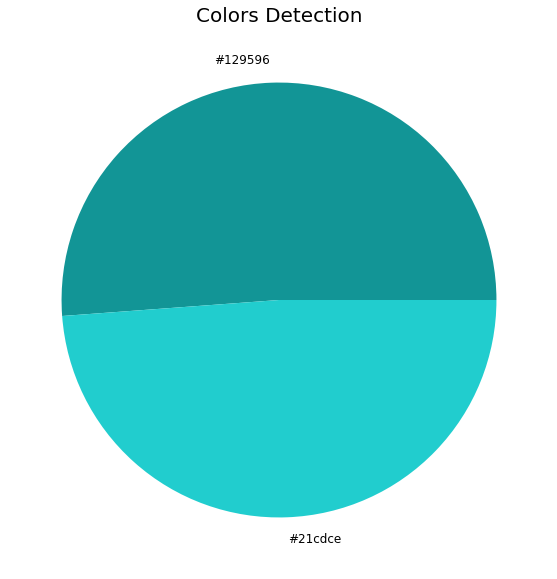

In [123]:
plt.title('Colors Detection', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [124]:
counts

Counter({1: 64737, 2: 61769})

In [125]:
hex_colors

['#129596', '#21cdce']